# Wide Activation for Efficient and Accurate Image Super-Resolution (WDSR)

In [1]:
import os
import matplotlib.pyplot as plt

from model.wdsr import wdsr_b
from train import WdsrTrainer

import cv2
import imageio
import numpy as np
import sewar
import pandas as pd

%matplotlib inline

In [2]:
## Load Directory Paths

def load_path(path):
    directories = []
    if os.path.isdir(path):
        print('directory path: ', path)
        directories.append(path)
    for elem in os.listdir(path): #check for nested dir within parent dir
        if os.path.isdir(os.path.join(path,elem)):
            print('inside nested dir')
            directories = directories + load_path(os.path.join(path,elem))
            directories.append(os.path.join(path,elem))
    print('directories: ', directories)
    return directories

In [3]:
## Load Images from directory

def load_data_from_dirs(dirs, ext):
    files = []
    file_names = []
    count = 0
    res = {}
    
    for d in dirs:
        for f in os.listdir(d):
            if f.endswith(ext):
                image = cv2.imread(os.path.join(d,f))
                files.append(image)
                file_names.append(os.path.join(d,f))
                count = count + 1
                res[os.path.join(d,f)] = image
    
    print('list of files: ',len(files))
    print('list of files path: ', len(file_names), 'file path: ', file_names[0])
    print('Files Read: ',count)
    
    return files

In [4]:
## Load Images

def load_data(directory, ext):
    files = load_data_from_dirs(load_path(directory), ext)
    return files

In [5]:
## Load HR Normal Images from directory

hr_0_imgs = load_data('D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/0/', '.png')

directory path:  D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/0/
directories:  ['D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/0/']
list of files:  811
list of files path:  811 file path:  D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/0/10273_idx5_x1001_y1901_class0.png
Files Read:  811


In [6]:
hr_0_imgs = hr_0_imgs[:300]

In [7]:
for img in hr_0_imgs:
    if img.shape != (50,50,3):
        print(img.shape)

(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)
(3, 50, 3)


In [8]:
new_hr_0_imgs = []
for img in hr_0_imgs:
    if img.shape != (50,50,3):
        continue
    else:
        new_hr_0_imgs.append(img)

In [9]:
len(new_hr_0_imgs)

283

In [10]:
## Load HR Diseased Images from directory

hr_1_imgs = load_data('D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/1/', '.png')

directory path:  D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/1/
directories:  ['D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/1/']
list of files:  1211
list of files path:  1211 file path:  D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/input/1/10273_idx5_x1001_y1001_class1.png
Files Read:  1211


In [11]:
hr_1_imgs = hr_1_imgs[:300]

In [12]:
for img in hr_1_imgs:
    if img.shape != (50,50,3):
        print(img.shape)

In [13]:
new_hr_1_imgs = hr_1_imgs[:200]

## Get Super Resolution for Normal Images

In [14]:
# Number of residual blocks
depth = 32

# Super-resolution factor
scale = 4

In [15]:
# Location of model weights
weights_dir = f'weights/wdsr-b-32-x4'
weights_file = os.path.join(weights_dir, 'weights.h5')

os.makedirs(weights_dir, exist_ok=True)

In [16]:
model = wdsr_b(scale=scale, num_res_blocks=depth)
model.load_weights(weights_file)

In [19]:
from model import resolve_single
from utils import load_image, plot_sample

def resolve_and_plot(img):
    sr = resolve_single(model, img)
    plot_sample(img, sr)

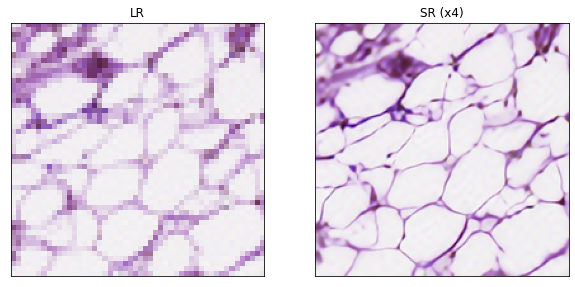

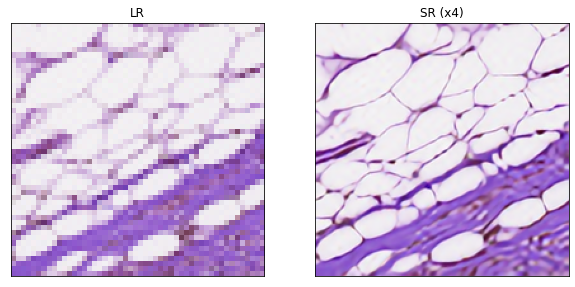

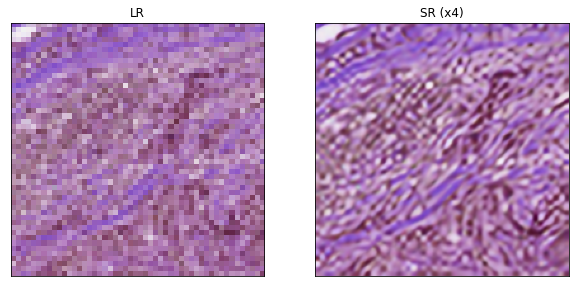

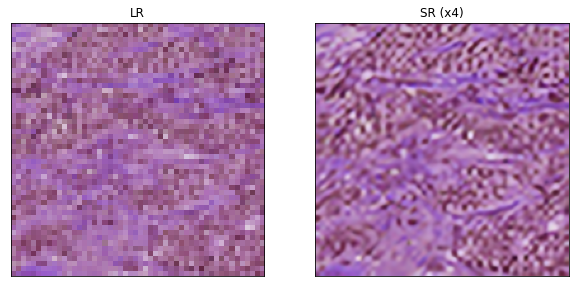

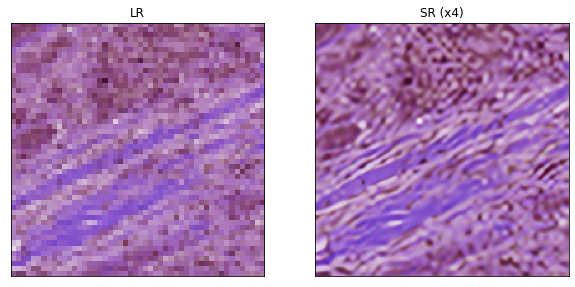

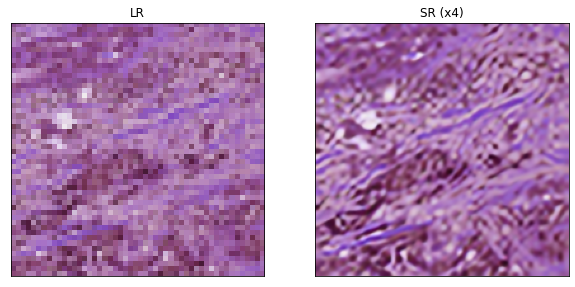

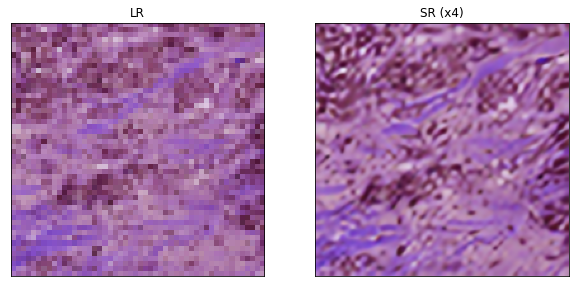

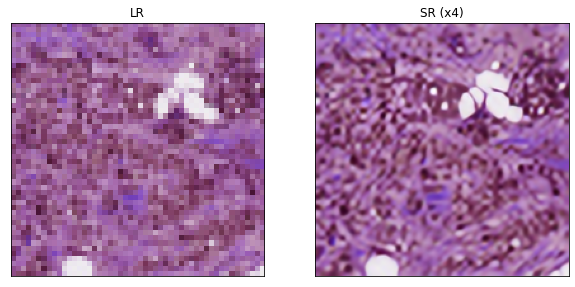

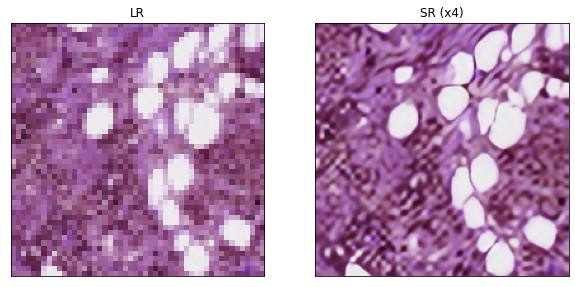

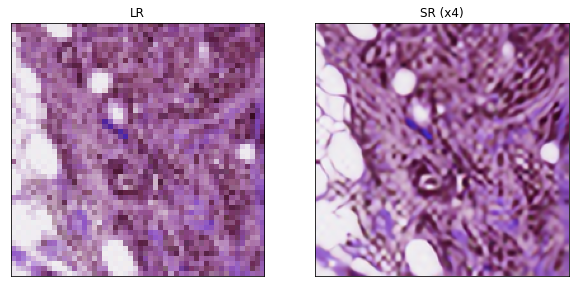

In [20]:
for img in new_hr_0_imgs[:10]:
    resolve_and_plot(img)

In [21]:
sr_0_imgs = []
for img in new_hr_0_imgs[:200]:
    sr = resolve_single(model, img)
    sr_0_imgs.append(cv2.resize(np.asarray(sr), (50, 50),
               interpolation = cv2.INTER_CUBIC))

In [23]:
for index, img in enumerate(new_hr_0_imgs):
    sr = resolve_single(model, img)
    imageio.imwrite('D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/output/0/hr_imgs/HR_'+str(index+1)+'.png', np.asarray(img).astype(np.uint8))
    imageio.imwrite('D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/output/0/sr_imgs/SR_'+str(index+1)+'.png', np.asarray(sr).astype(np.uint8))

## Get Super Resolution for Diseased Images

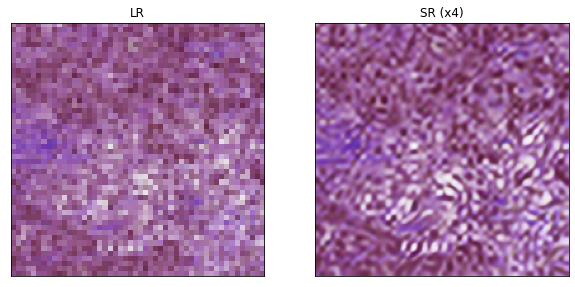

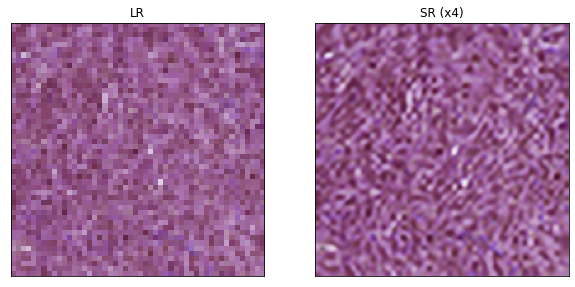

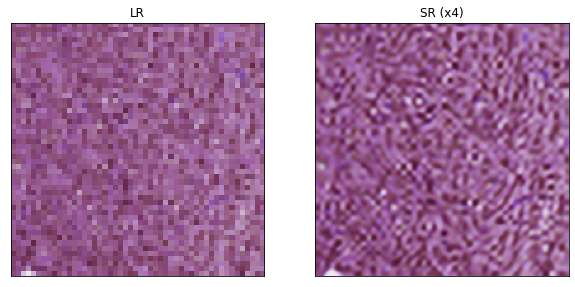

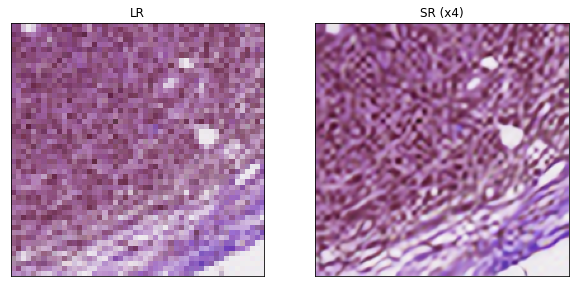

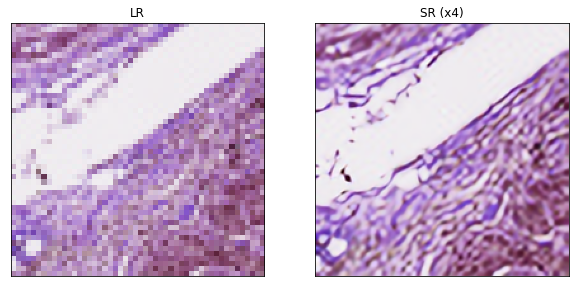

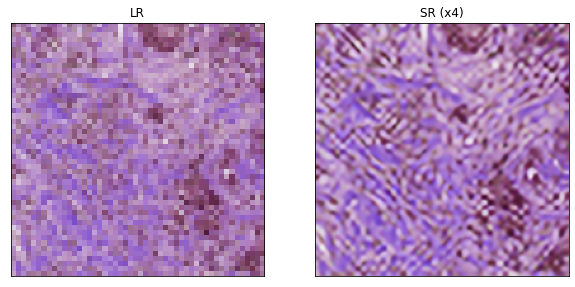

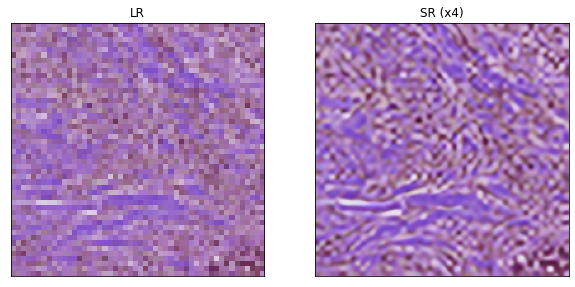

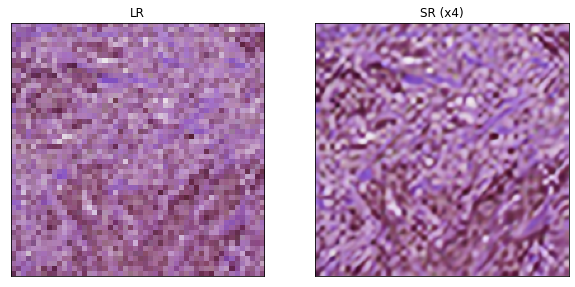

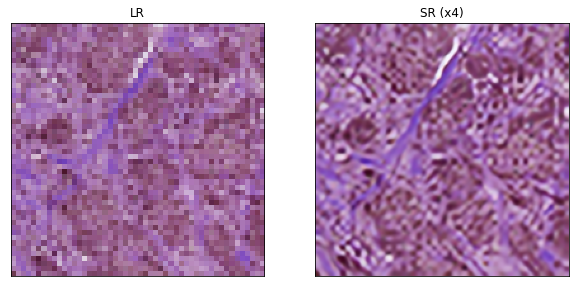

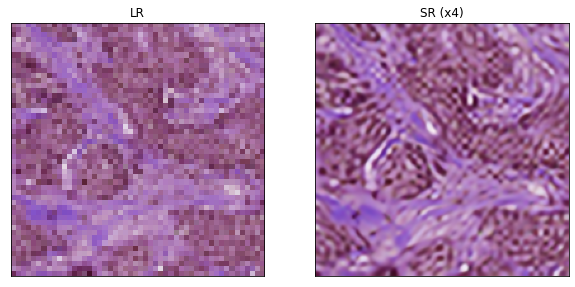

In [24]:
for img in hr_1_imgs[:10]:
    resolve_and_plot(img)

In [25]:
sr_1_imgs = []
for img in new_hr_0_imgs[:200]:
    sr = resolve_single(model, img)
    sr_1_imgs.append(cv2.resize(np.asarray(sr), (50, 50),
               interpolation = cv2.INTER_CUBIC))

In [26]:
for index, img in enumerate(hr_1_imgs):
    sr = resolve_single(model, img)
    imageio.imwrite('D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/output/1/hr_imgs/HR_'+str(index+1)+'.png', np.asarray(img).astype(np.uint8))
    imageio.imwrite('D:/M.Tech Thesis/git/super-resolution-master/BHP  Images/output/1/sr_imgs/SR_'+str(index+1)+'.png', np.asarray(sr).astype(np.uint8))

## Metric Calculations for Normal Images

### SSIM Calculation

In [27]:
sewar.full_ref.ssim(new_hr_0_imgs[12],sr_0_imgs[12])[0]

0.9091691065739193

In [28]:
ssim_normal_arr = []
for i in range(200):
    ssim_normal_arr.append(sewar.full_ref.ssim(new_hr_0_imgs[i],sr_0_imgs[i])[0])
print(ssim_normal_arr[:10])

[0.8215577886896012, 0.8303097705845585, 0.8225212283736258, 0.8361295270525853, 0.8499949394618161, 0.8639777145678069, 0.8876805211690133, 0.8803320887065359, 0.9088200498564832, 0.8876268327175311]


In [29]:
ssim_normal_mean, ssim_normal_std = np.mean(ssim_normal_arr), np.std(ssim_normal_arr)
print(ssim_normal_mean, ssim_normal_std)

0.8610079903407191 0.032927979568844516


### Mean Absolute Error

In [30]:
def MAE(true_img, pred_img):
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric

In [31]:
print(MAE(new_hr_0_imgs[11], sr_0_imgs[11]))

0.0008


In [32]:
mae_normal_arr = []
for i in range(200):
    mae_normal_arr.append(MAE(new_hr_0_imgs[i],sr_0_imgs[i]))
print(mae_normal_arr[:10])

[0.0036, 0.006933333333333333, 0.00013333333333333334, 0.00013333333333333334, 0.0002666666666666667, 0.00013333333333333334, 0.00013333333333333334, 0.0004, 0.0005333333333333334, 0.00013333333333333334]


In [33]:
mae_normal_mean, mae_normal_std = np.mean(mae_normal_arr), np.std(mae_normal_arr)
print(mae_normal_mean, mae_normal_std)

0.0020286666666666665 0.001869563347712805


### Mean Percentage Error

In [34]:
def MPE(true_img, pred_img):
    
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric * 100

In [35]:
print(MPE(new_hr_0_imgs[11], sr_0_imgs[11]))

0.08


In [36]:
mpe_normal_arr = []
for i in range(200):
    mpe_normal_arr.append(MPE(new_hr_0_imgs[i],sr_0_imgs[i]))
print(mpe_normal_arr[:10])

[0.36, 0.6933333333333334, 0.013333333333333334, 0.013333333333333334, 0.02666666666666667, 0.013333333333333334, 0.013333333333333334, 0.04, 0.05333333333333334, 0.013333333333333334]


In [37]:
mpe_normal_mean, mpe_normal_std = np.mean(mpe_normal_arr), np.std(mpe_normal_arr)
print(mpe_normal_mean, mpe_normal_std)

0.20286666666666664 0.18695633477128049


### Mean Square Error

In [38]:
ans = sewar.full_ref.mse(new_hr_0_imgs[21],sr_0_imgs[21])
print(ans, type(ans))

286.5910666666667 <class 'numpy.float64'>


In [39]:
mse_normal_arr = []
for i in range(200):
    mse_normal_arr.append(sewar.full_ref.mse(new_hr_0_imgs[i],sr_0_imgs[i]))
    
## Display Results for starting 10 images

print(mse_normal_arr[:10])

[311.96186666666665, 443.0362666666667, 365.9028, 306.03773333333334, 245.0072, 284.6224, 200.81533333333334, 271.21746666666667, 336.05213333333336, 355.0476]


In [40]:
mse_normal_mean, mse_normal_std = np.mean(mse_normal_arr), np.std(mse_normal_arr)
print("mean: ", mse_normal_mean, " std: ", mse_normal_std)

mean:  294.2530786666666  std:  89.90026091812162


### Root Mean Square Error

In [41]:
ans = sewar.full_ref.rmse(new_hr_0_imgs[2],sr_0_imgs[2])
print(ans, type(ans))

19.12858593832801 <class 'numpy.float64'>


In [42]:
rmse_normal_arr = []
for i in range(200):
    rmse_normal_arr.append(sewar.full_ref.rmse(new_hr_0_imgs[i],sr_0_imgs[i]))
    
## Display Results for starting 10 images

print(rmse_normal_arr[:10])

[17.66244226223165, 21.048426702883678, 19.12858593832801, 17.493934186835542, 15.65270583637219, 16.87075576256144, 14.170932691016965, 16.468681388218872, 18.331724777918016, 18.84270681192063]


In [43]:
rmse_normal_mean, rmse_normal_std = np.mean(rmse_normal_arr), np.std(rmse_normal_arr)
print("mean: ", rmse_normal_mean, " std: ", rmse_normal_std)

mean:  16.9202624975638  std:  2.8209565186657266


### PSNR

In [44]:
ans = sewar.full_ref.psnr(new_hr_0_imgs[2],sr_0_imgs[2])
print(ans, type(ans))

22.49714628014545 <class 'numpy.float64'>


In [45]:
psnr_normal_arr = []
for i in range(200):
    psnr_normal_arr.append(sewar.full_ref.psnr(new_hr_0_imgs[i],sr_0_imgs[i]))
    
## Display Results for starting 10 images
print(psnr_normal_arr[:10])

[23.189788505302133, 21.666410821199346, 22.49714628014545, 23.27305384163595, 24.23901513751035, 23.588112844675845, 25.102834904038072, 23.797627057883606, 22.866737041248516, 22.627937795549652]


In [46]:
psnr_normal_mean, psnr_normal_std = np.mean(psnr_normal_arr), np.std(psnr_normal_arr)
print("mean: ", psnr_normal_mean, " std: ", psnr_normal_std)

mean:  23.704509464412364  std:  1.6461638547518376


### Multi-Scale Structural Similarity Index (MS-SSIM)

In [47]:
ans = sewar.full_ref.msssim(new_hr_0_imgs[2],sr_0_imgs[2])
print(ans, type(ans))

(0.9788395817362514+0j) <class 'numpy.complex128'>


In [48]:
msssim_normal_arr = []
for i in range(200):
    msssim_normal_arr.append(sewar.full_ref.msssim(new_hr_0_imgs[i],sr_0_imgs[i]).real)
    
## Display Results for starting 10 images
print(msssim_normal_arr[:10])

[0.9649569172744329, 0.9609971977254977, 0.9788395817362514, 0.9763236573681733, 0.9813651664293201, 0.9854946488619682, 0.986192085338683, 0.9816744560992492, 0.9880688021341469, 0.9850748567411503]


In [49]:
msssim_normal_mean, msssim_normal_std = np.mean(msssim_normal_arr), np.std(msssim_normal_arr)
print("mean: ", msssim_normal_mean,  " std: ", msssim_normal_std)

mean:  0.9778936091223135  std:  0.010412897725569652


### Spatial Corelation Coefficient (SCC)

In [50]:
ans = sewar.full_ref.scc(new_hr_0_imgs[2],sr_0_imgs[2])
print(ans, type(ans))

0.9452146103030827 <class 'numpy.float64'>


In [51]:
scc_normal_arr = []
for i in range(200):
    scc_normal_arr.append(sewar.full_ref.scc(new_hr_0_imgs[i],sr_0_imgs[i]))
    
## Display Results for starting 10 images

print(scc_normal_arr[:10])

[0.8537703370225763, 0.861658132732711, 0.9452146103030827, 0.9540614986497896, 0.9432671021973821, 0.9484524260290993, 0.947674319624906, 0.9477480382481805, 0.9313282733085245, 0.9327592375125421]


In [52]:
scc_normal_mean, scc_normal_std = np.mean(scc_normal_arr), np.std(scc_normal_arr)
print("mean: ", scc_normal_mean,  " std: ", scc_normal_std)

mean:  0.9122139019756497  std:  0.033208446024686346


### Pixel Based Visual Information Fidelity (vif-p)

In [53]:
ans = sewar.full_ref.vifp(new_hr_0_imgs[21],sr_0_imgs[21])
print(ans, type(ans))

0.408876691072058 <class 'numpy.float64'>


In [54]:
vifp_normal_arr = []
for i in range(200):
    vifp_normal_arr.append(sewar.full_ref.vifp(new_hr_0_imgs[i],sr_0_imgs[i]))
    
## Display Results for starting 10 images
print(vifp_normal_arr[:10])

[0.308081076019275, 0.30559264151147303, 0.3852381429753508, 0.44079873807471576, 0.4079446566855438, 0.41444861132583305, 0.4470737696780435, 0.4041981159572523, 0.4036141202232577, 0.40055558584856765]


In [55]:
vifp_normal_mean, vifp_normal_std = np.mean(vifp_normal_arr), np.std(vifp_normal_arr)
print("mean: ", vifp_normal_mean,  " std: ", vifp_normal_std)

mean:  0.38392688715151174  std:  0.05132407481328421


## Visualizing Metrics for Normal Images

In [56]:
## Define error bar plot function

def error_barplot(error_arr,title='', file_name=''):
    
    # Calculate the average
    error_mean = np.mean(error_arr)
    
    # Calculate the standard deviation
    error_std = np.std(error_arr)

    # Define labels, positions, bar heights and error bar heights
    labels = ['For 200 Images']
    x_pos = np.arange(len(labels))
    CTEs = [error_mean]
    error = [error_std]
    
    # Build the plot
    fig, ax = plt.subplots(figsize=(5,5))
    ax.bar(x_pos, CTEs,yerr=error,align='center',alpha=0.5,ecolor='black',capsize=10)
#     ax.set_ylabel('Mean Percentage Error')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels)
    ax.set_title(title)
    ax.yaxis.grid(True)
    
    plt.savefig(f"./BHP  Images/visualizations/normal/error_barplot/{file_name}.png")

    # Save the figure and show
    plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()

### ErrorBar Plot for MAE, MPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC and VIF-P

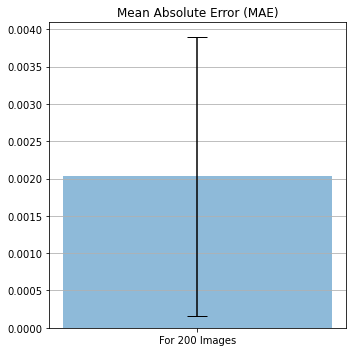

In [57]:
error_barplot(mae_normal_arr,title='Mean Absolute Error (MAE)', file_name='mae_barplot')

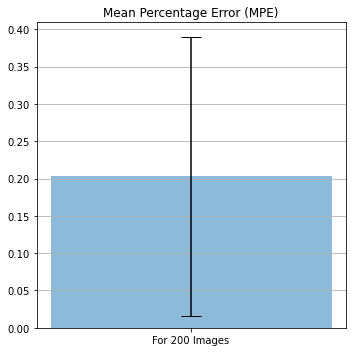

In [58]:
error_barplot(mpe_normal_arr,title='Mean Percentage Error (MPE)', file_name='mpe_barplot')

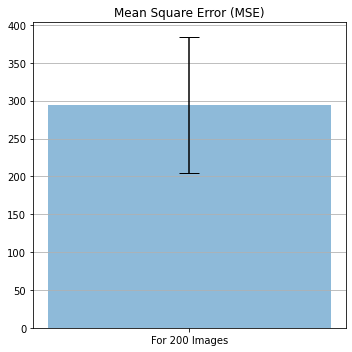

In [59]:
error_barplot(mse_normal_arr,title='Mean Square Error (MSE)', file_name='mse_barplot')

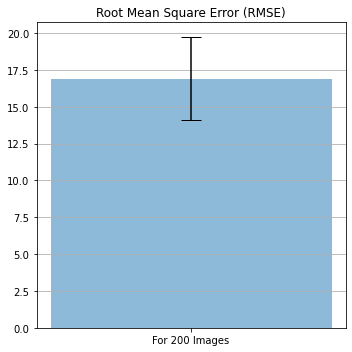

In [60]:
error_barplot(rmse_normal_arr,title='Root Mean Square Error (RMSE)', file_name='rmse_barplot')

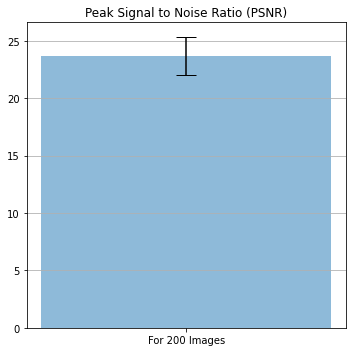

In [61]:
error_barplot(psnr_normal_arr,title='Peak Signal to Noise Ratio (PSNR)', file_name='psnr_barplot')

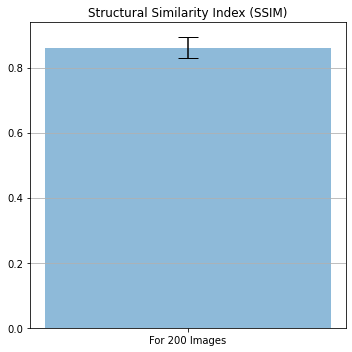

In [62]:
error_barplot(ssim_normal_arr,title='Structural Similarity Index (SSIM)', file_name='ssim_barplot')

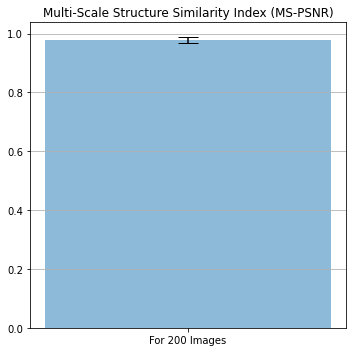

In [63]:
error_barplot(msssim_normal_arr,title='Multi-Scale Structure Similarity Index (MS-PSNR)',file_name='msssim_barplot')

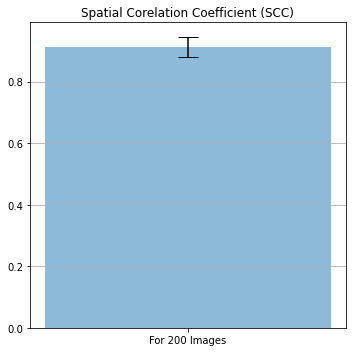

In [64]:
error_barplot(scc_normal_arr,title='Spatial Corelation Coefficient (SCC)', file_name='scc_barplot')

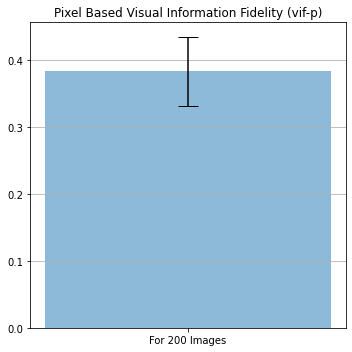

In [65]:
error_barplot(vifp_normal_arr,title='Pixel Based Visual Information Fidelity (vif-p)', file_name='vifp_barplot')

### Scatter Plot for MAE, MPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC and VIF-P

In [66]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(8,8)})

In [67]:
metric_dict = {'Images': [i for i in range(1,201)],
            'MAE' : mae_normal_arr,
            'MPE' : mpe_normal_arr,
            'MSE' : mse_normal_arr,
            'RMSE' : rmse_normal_arr,
            'PSNR' : psnr_normal_arr,
            'SSIM' : ssim_normal_arr,
            'MSSSIM' : msssim_normal_arr,
            'SCC' : scc_normal_arr,
            'VIFP' : vifp_normal_arr
         }
metric_df = pd.DataFrame(metric_dict)

In [68]:
def getScatterPlot(y_val,df,title='', file_name=''):
    
    sns_plt = sns.scatterplot(x=metric_df.Images, y=y_val, data=df, linewidth=2.5).set_title(title)
    sns_fig = sns_plt.get_figure()
    sns_fig.savefig(f"./BHP  Images/visualizations/normal/scatter/{file_name}.png")

In [69]:
def RegPlot(y_val,df,title='', file_name=''):
    
    sns_plt = sns.regplot(x=metric_df.Images, y=y_val, data=df).set_title(title)
    sns_fig = sns_plt.get_figure()
    sns_fig.savefig(f"./BHP  Images/visualizations/normal/regression/{file_name}.png")

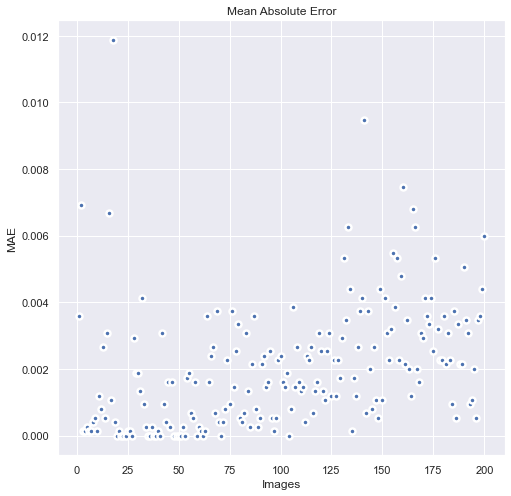

In [70]:
getScatterPlot(metric_df.MAE, metric_df, 'Mean Absolute Error', 'mae_scatter')

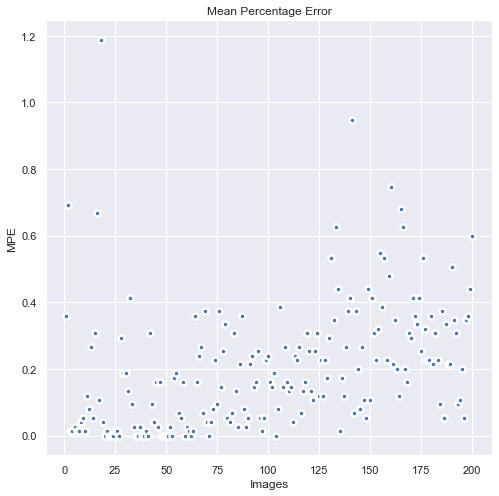

In [71]:
getScatterPlot(metric_df.MPE, metric_df, title='Mean Percentage Error', file_name='mpe_scatter')

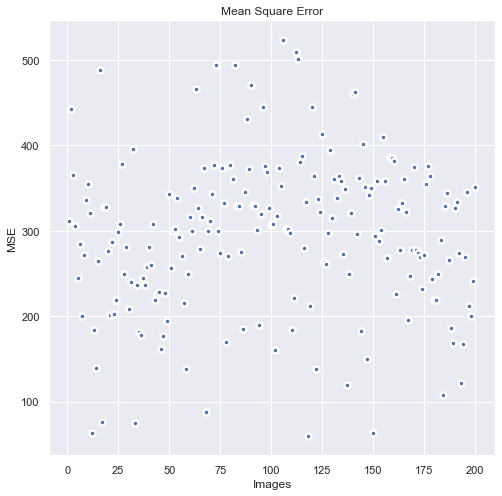

In [72]:
getScatterPlot(metric_df.MSE, metric_df, title='Mean Square Error', file_name='mse_scatter')

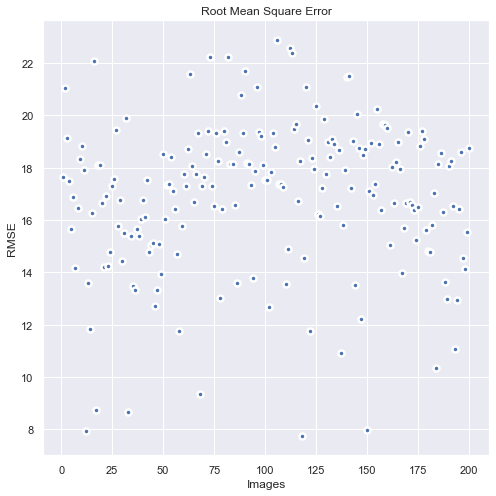

In [73]:
getScatterPlot(metric_df.RMSE, metric_df, title='Root Mean Square Error', file_name='rmse_scatter')

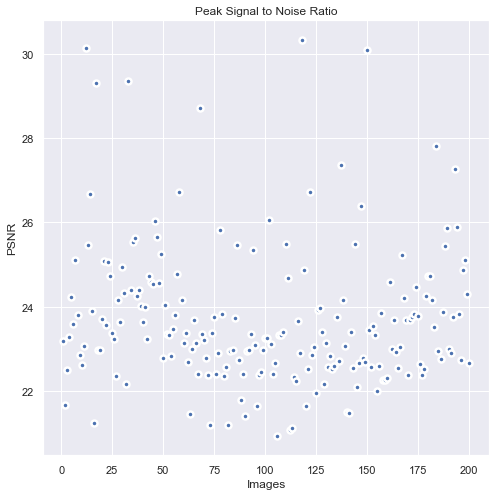

In [74]:
getScatterPlot(metric_df.PSNR, metric_df, title='Peak Signal to Noise Ratio', file_name='psnr_scatter')

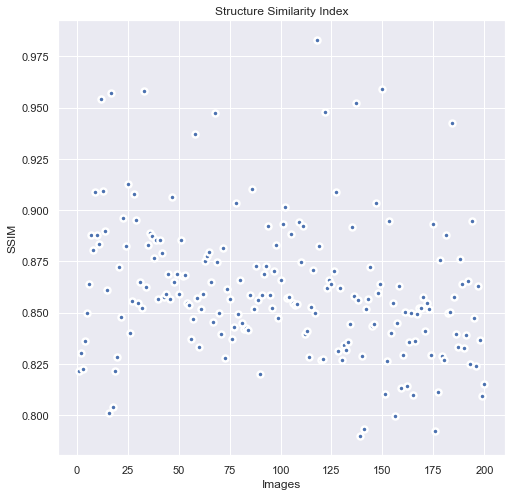

In [75]:
getScatterPlot(metric_df.SSIM, metric_df, title='Structure Similarity Index', file_name='ssim_scatter')

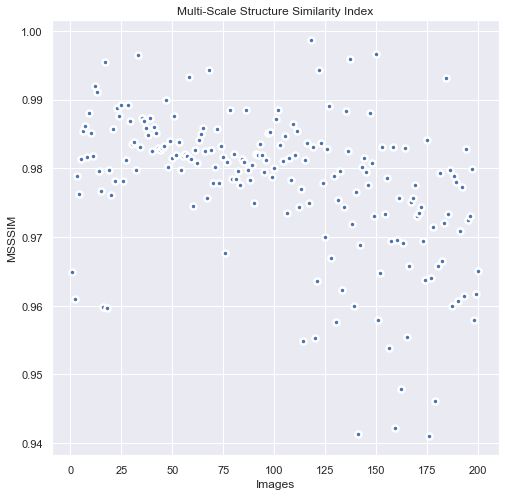

In [76]:
getScatterPlot(metric_df.MSSSIM, metric_df, title='Multi-Scale Structure Similarity Index', file_name='msssim_scatter')

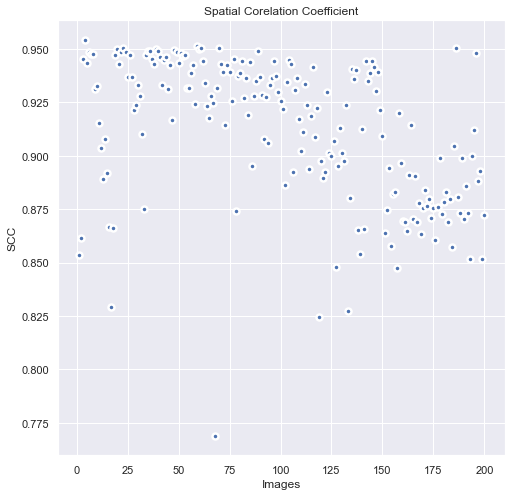

In [77]:
getScatterPlot(metric_df.SCC, metric_df, title='Spatial Corelation Coefficient', file_name='scc_scatter')

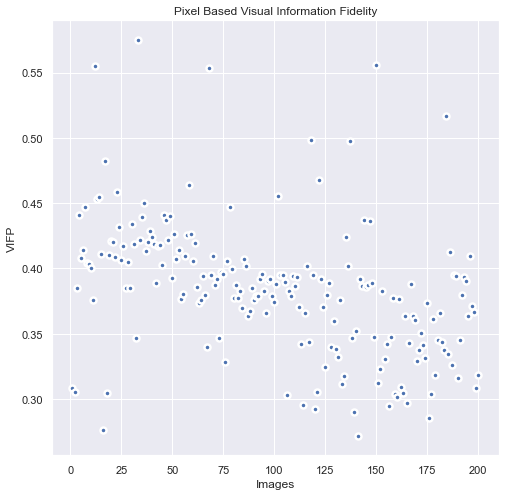

In [78]:
getScatterPlot(metric_df.VIFP, metric_df, title='Pixel Based Visual Information Fidelity', file_name='vifp_scatter')

### Regression Plot for MAE, MPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC and VIF-P

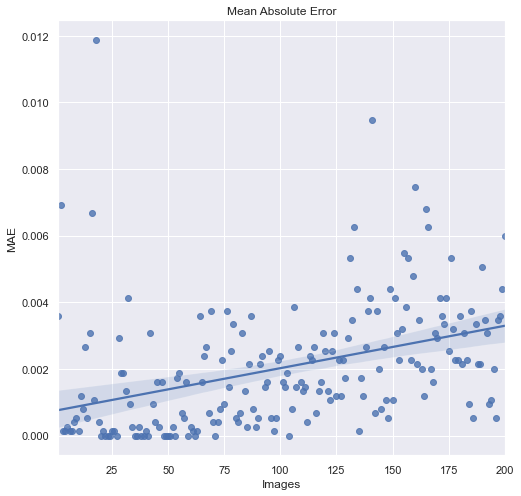

In [79]:
RegPlot(metric_df.MAE, metric_df, 'Mean Absolute Error', 'mae_scatter')

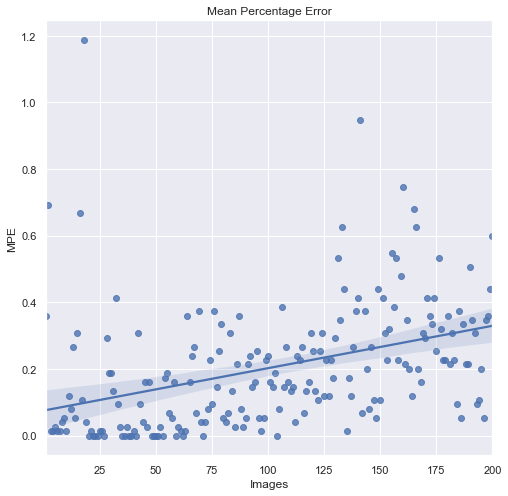

In [80]:
RegPlot(metric_df.MPE, metric_df, title='Mean Percentage Error', file_name='mpe_scatter')

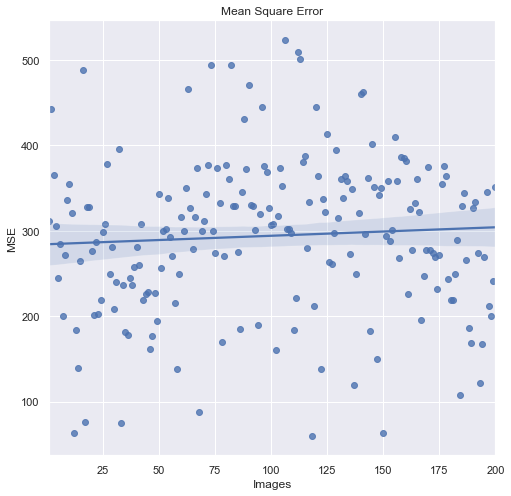

In [81]:
RegPlot(metric_df.MSE, metric_df, title='Mean Square Error', file_name='mse_scatter')

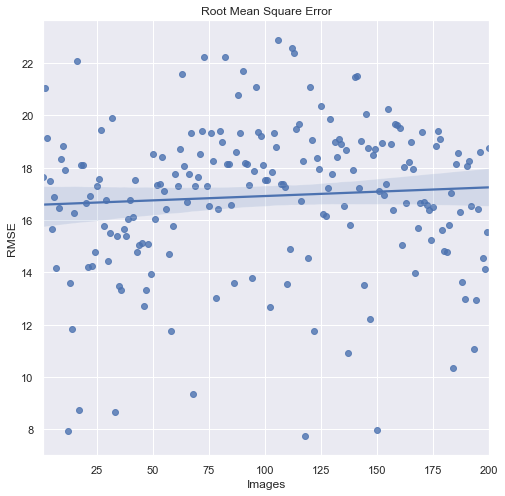

In [82]:
RegPlot(metric_df.RMSE, metric_df, title='Root Mean Square Error', file_name='rmse_scatter')

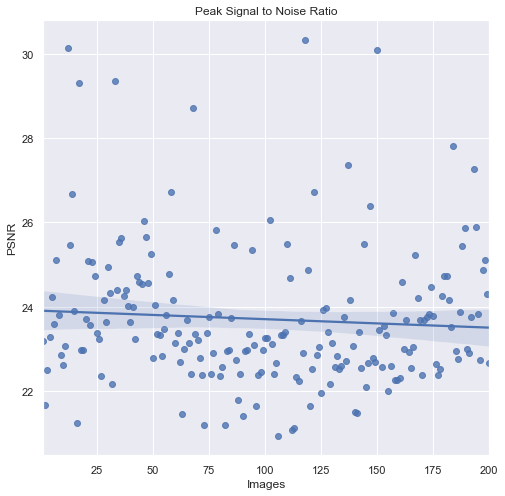

In [83]:
RegPlot(metric_df.PSNR, metric_df, title='Peak Signal to Noise Ratio', file_name='psnr_scatter')

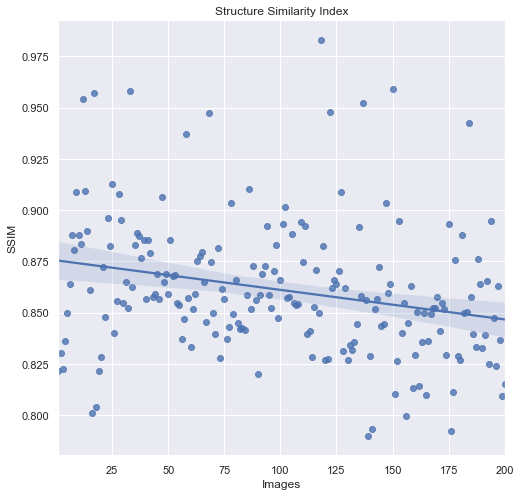

In [84]:
RegPlot(metric_df.SSIM, metric_df, title='Structure Similarity Index', file_name='ssim_scatter')

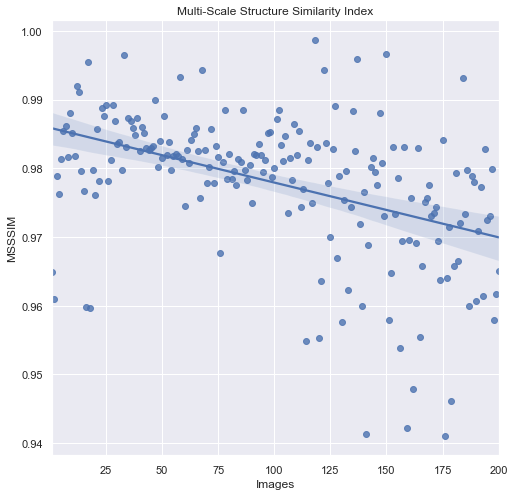

In [85]:
RegPlot(metric_df.MSSSIM, metric_df, title='Multi-Scale Structure Similarity Index', file_name='msssim_scatter')

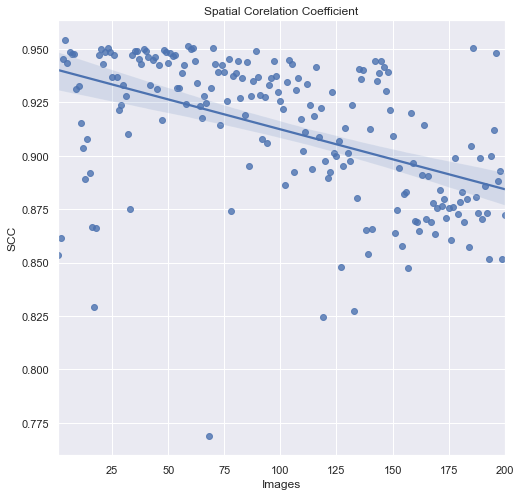

In [86]:
RegPlot(metric_df.SCC, metric_df, title='Spatial Corelation Coefficient', file_name='scc_scatter')

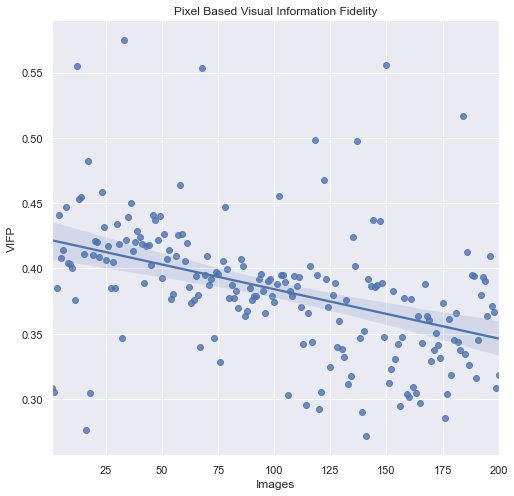

In [87]:
RegPlot(metric_df.VIFP, metric_df, title='Pixel Based Visual Information Fidelity', file_name='vifp_scatter')

## Metric Calculations for Diseased Images

### SSIM

In [88]:
sewar.full_ref.ssim(new_hr_1_imgs[12],sr_1_imgs[12])[0]

0.0551727909799126

In [89]:
ssim_cancer_arr = []
for i in range(200):
    ssim_cancer_arr.append(sewar.full_ref.ssim(new_hr_1_imgs[i],sr_1_imgs[i])[0])
print(ssim_cancer_arr[:10])

[0.027004309365548648, 0.01274280619819483, 0.008764555678804463, 0.06306981119996301, 0.03742622067998897, 0.018173767016310682, 0.010781889898578173, 0.018722111079371787, 0.018323267763076235, -0.031799681316977]


In [90]:
ssim_cancer_mean, ssim_cancer_std = np.mean(ssim_cancer_arr), np.std(ssim_cancer_arr)
print(ssim_cancer_mean, ssim_cancer_std)

0.034378686102652496 0.02093905633375093


### Mean Absolute Error (MAE)

In [91]:
def MAE(true_img, pred_img):
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric

In [92]:
MAE(new_hr_1_imgs[12],sr_1_imgs[12])

0.0026666666666666666

In [93]:
mae_cancer_arr = []
for i in range(200):
    mae_cancer_arr.append(MAE(new_hr_1_imgs[i],sr_1_imgs[i]))
print(mae_cancer_arr[:10])

[0.0036, 0.006933333333333333, 0.00013333333333333334, 0.00013333333333333334, 0.0002666666666666667, 0.00013333333333333334, 0.00013333333333333334, 0.0004, 0.0005333333333333334, 0.00013333333333333334]


In [94]:
mae_cancer_mean, mae_cancer_std = np.mean(mae_cancer_arr), np.std(mae_cancer_arr)
print(mae_cancer_mean, mae_cancer_std)

0.0020286666666666665 0.001869563347712805


### Mean Percentage Error (MPE)

In [95]:
def MPE(true_img, pred_img):
    
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric * 100

In [96]:
MPE(new_hr_1_imgs[12],sr_1_imgs[12])

0.26666666666666666

In [97]:
mpe_cancer_arr = []
for i in range(200):
    mpe_cancer_arr.append(MPE(new_hr_1_imgs[i],sr_1_imgs[i]))
print(mpe_cancer_arr[:10])

[0.36, 0.6933333333333334, 0.013333333333333334, 0.013333333333333334, 0.02666666666666667, 0.013333333333333334, 0.013333333333333334, 0.04, 0.05333333333333334, 0.013333333333333334]


In [98]:
mpe_cancer_mean, mpe_cancer_std = np.mean(mpe_cancer_arr), np.std(mpe_cancer_arr)
print(mpe_cancer_mean, mpe_cancer_std)

0.20286666666666664 0.18695633477128049


### Mean Square Error

In [99]:
ans = sewar.full_ref.mse(new_hr_1_imgs[21],sr_1_imgs[21])
print(ans, type(ans))

2102.9965333333334 <class 'numpy.float64'>


In [100]:
mse_cancer_arr = []
for i in range(200):
    mse_cancer_arr.append(sewar.full_ref.mse(new_hr_1_imgs[i],sr_1_imgs[i]))
print(mse_cancer_arr[:10])

[9686.296666666667, 9291.352266666667, 2584.4614666666666, 2532.3, 5062.601733333333, 2434.1306666666665, 2004.1613333333332, 2584.888266666667, 3787.6621333333333, 4104.292133333333]


In [101]:
mse_cancer_mean, mse_cancer_std = np.mean(mse_cancer_arr), np.std(mse_cancer_arr)
print(mse_cancer_mean, mse_cancer_std)

5890.320571333333 2837.193755967392


### Root Mean Square Error

In [102]:
ans = sewar.full_ref.rmse(new_hr_1_imgs[2],sr_1_imgs[2])
print(ans, type(ans))

50.837598946711346 <class 'numpy.float64'>


In [103]:
rmse_cancer_arr = []
for i in range(200):
    rmse_cancer_arr.append(sewar.full_ref.rmse(new_hr_1_imgs[i],sr_1_imgs[i]))
print(rmse_cancer_arr[:10])

[98.4189852958598, 96.39166077346457, 50.837598946711346, 50.32196339571818, 71.15196225919095, 49.33690978027167, 44.76786049537473, 50.84179645396755, 61.54398535464967, 64.06474953773981]


In [104]:
rmse_cancer_mean, rmse_cancer_std = np.mean(rmse_cancer_arr), np.std(rmse_cancer_arr)
print(rmse_cancer_mean, rmse_cancer_std)

74.36574069891981 18.97517276955216


### PSNR

In [105]:
ans = sewar.full_ref.psnr(new_hr_1_imgs[2],sr_1_imgs[2])
print(ans, type(ans))

14.007102994807765 <class 'numpy.float64'>


In [106]:
psnr_cancer_arr = []
for i in range(200):
    psnr_cancer_arr.append(sewar.full_ref.psnr(new_hr_1_imgs[i],sr_1_imgs[i]))
print(psnr_cancer_arr[:10])

[8.269225946166872, 8.450014349030402, 14.007102994807765, 14.095652058785657, 11.087065973797303, 14.267364729684681, 15.111476819181098, 14.006385856696166, 12.347091287027824, 11.998420956600262]


In [107]:
psnr_cancer_mean, psnr_cancer_std = np.mean(psnr_cancer_arr), np.std(psnr_cancer_arr)
print(psnr_cancer_mean, psnr_cancer_std)

11.002926380006672 2.317142424502377


### Multi-Scale Structure Similarity Index MS-SSIM

In [108]:
ans = sewar.full_ref.msssim(new_hr_1_imgs[2],sr_1_imgs[2])
print(ans, type(ans))

(0.30778416703239464+0j) <class 'numpy.complex128'>


In [109]:
msssim_cancer_arr = []
for i in range(200):
    msssim_cancer_arr.append(sewar.full_ref.msssim(new_hr_1_imgs[i],sr_1_imgs[i]).real)
print(msssim_cancer_arr[:10])

[0.3382226585159481, 0.21834140459274204, 0.30778416703239464, 0.4133651682988887, 0.21126025809527296, 0.30107642959846176, 0.3218467184033262, 0.25011817919285884, 0.08028911092655543, 0.06284955346628719]


In [110]:
msssim_cancer_mean, msssim_cancer_std = np.mean(msssim_cancer_arr), np.std(msssim_cancer_arr)
print(msssim_cancer_mean, msssim_cancer_std)

0.23285918458771954 0.10853735390350872


### Spatial Corelation Coefficient (SCC)

In [111]:
ans = sewar.full_ref.scc(new_hr_1_imgs[2],sr_1_imgs[2])
print(ans, type(ans))

-0.03417866177671585 <class 'numpy.float64'>


In [112]:
scc_cancer_arr = []
for i in range(200):
    scc_cancer_arr.append(sewar.full_ref.scc(new_hr_1_imgs[i],sr_1_imgs[i]))
print(scc_cancer_arr[:10])

[-0.01848796299935505, -0.030588772790016733, -0.03417866177671585, 0.034984758975969664, 0.014252911529779854, -0.015591877274682565, -0.00804139715296694, -0.005629949585493994, -0.01159720840416224, 0.00882676871273515]


In [113]:
scc_cancer_mean, scc_cancer_std = np.mean(scc_cancer_arr), np.std(scc_cancer_arr)
print(scc_cancer_mean, scc_cancer_std)

0.002292357593631113 0.019581922118542712


### Pixel Based Visual Information Fidelity (vif-p)

In [114]:
ans = sewar.full_ref.vifp(new_hr_1_imgs[2],sr_1_imgs[2])
print(ans, type(ans))

0.0010914300521247665 <class 'numpy.float64'>


In [115]:
vifp_cancer_arr = []
for i in range(200):
    vifp_cancer_arr.append(sewar.full_ref.vifp(new_hr_1_imgs[i],sr_1_imgs[i]))
print(vifp_cancer_arr[:10])

[0.004057812307516585, 0.0007090039524313948, 0.0010914300521247665, 0.0030170540293844666, 0.003034092484358275, 0.002168883412237049, 0.002775673203004252, 0.003022503753687027, 0.000880268348773423, 0.0022050116604049215]


In [116]:
vifp_cancer_mean, vifp_cancer_std = np.mean(vifp_cancer_arr), np.std(vifp_cancer_arr)
print(vifp_cancer_mean, vifp_cancer_std)

0.0027040994013161203 0.0018366771613670832


### Visualizing Error Barplots for MAE, MAPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC, and VIF-P

In [117]:
## Define error bar plot function

def error_barplot(error_arr,title='', file_name=''):
    
    # Calculate the average
    error_mean = np.mean(error_arr)
    
    # Calculate the standard deviation
    error_std = np.std(error_arr)

    # Define labels, positions, bar heights and error bar heights
    labels = ['For 200 Images']
    x_pos = np.arange(len(labels))
    CTEs = [error_mean]
    error = [error_std]
    
    # Build the plot
    fig, ax = plt.subplots(figsize=(5,5))
    ax.bar(x_pos, CTEs,yerr=error,align='center',alpha=0.5,ecolor='black',capsize=10)
#     ax.set_ylabel('Mean Percentage Error')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels)
    ax.set_title(title)
    ax.yaxis.grid(True)
    
    plt.savefig(f"./BHP  Images/visualizations/diseased/error_barplot/{file_name}.png")

    # Save the figure and show
    plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()

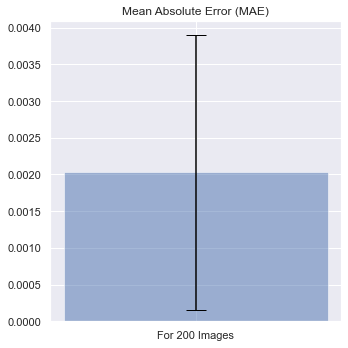

In [118]:
error_barplot(mae_cancer_arr,title='Mean Absolute Error (MAE)', file_name='mae_barplot')

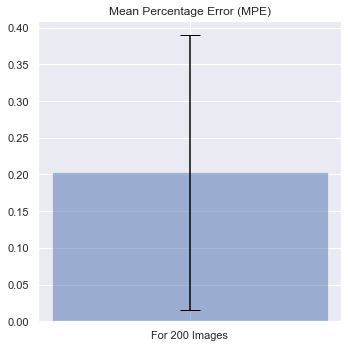

In [119]:
error_barplot(mpe_cancer_arr,title='Mean Percentage Error (MPE)', file_name='mpe_barplot')

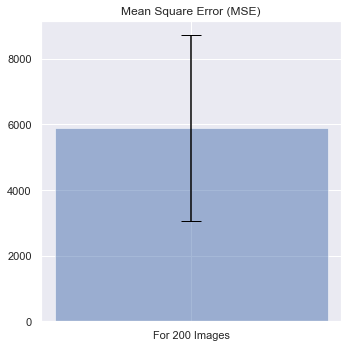

In [120]:
error_barplot(mse_cancer_arr,title='Mean Square Error (MSE)', file_name='mse_barplot')

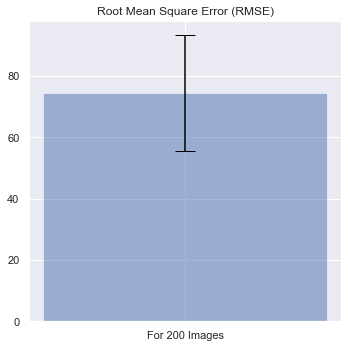

In [121]:
error_barplot(rmse_cancer_arr,title='Root Mean Square Error (RMSE)', file_name='rmse_barplot')

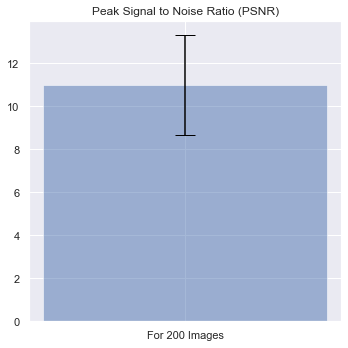

In [122]:
error_barplot(psnr_cancer_arr,title='Peak Signal to Noise Ratio (PSNR)', file_name='psnr_barplot')

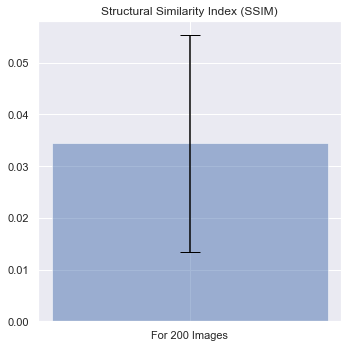

In [123]:
error_barplot(ssim_cancer_arr,title='Structural Similarity Index (SSIM)', file_name='ssim_barplot')

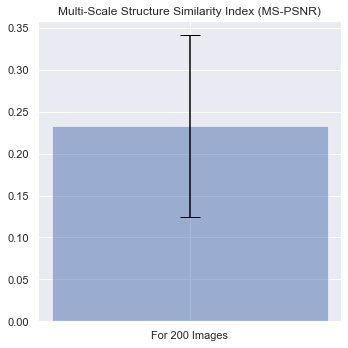

In [124]:
error_barplot(msssim_cancer_arr,title='Multi-Scale Structure Similarity Index (MS-PSNR)',file_name='msssim_barplot')

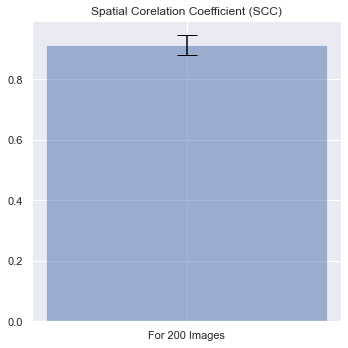

In [125]:
error_barplot(scc_normal_arr,title='Spatial Corelation Coefficient (SCC)', file_name='scc_barplot')

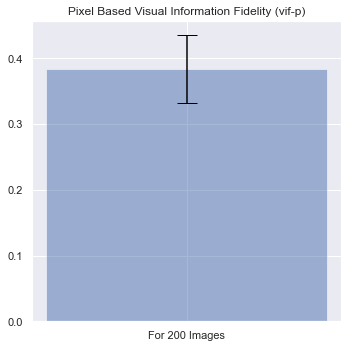

In [126]:
error_barplot(vifp_normal_arr,title='Pixel Based Visual Information Fidelity (vif-p)', file_name='vifp_barplot')

### Scatter Plot for MAE, MAPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC, and VIF-P

In [127]:
metric_dict_cancer = {'Images': [i for i in range(1,201)],
            'MAE' : mae_cancer_arr,
            'MPE' : mpe_cancer_arr,
            'MSE' : mse_cancer_arr,
            'RMSE' : rmse_cancer_arr,
            'PSNR' : psnr_cancer_arr,
            'SSIM' : ssim_cancer_arr,
            'MSSSIM' : msssim_cancer_arr,
            'SCC' : scc_cancer_arr,
            'VIFP' : vifp_cancer_arr
         }
metric_df_cancer = pd.DataFrame(metric_dict_cancer)

In [128]:
def getScatterPlot(y_val,df,title='', file_name=''):
    
    sns_plt = sns.scatterplot(x=metric_df.Images, y=y_val, data=df, linewidth=2.5).set_title(title)
    sns_fig = sns_plt.get_figure()
    sns_fig.savefig(f"./BHP  Images/visualizations/diseased/scatter/{file_name}.png")

In [129]:
def RegPlot(y_val,df,title='', file_name=''):
    
    sns_plt = sns.regplot(x=metric_df.Images, y=y_val, data=df).set_title(title)
    sns_fig = sns_plt.get_figure()
    sns_fig.savefig(f"./BHP  Images/visualizations/diseased/regression/{file_name}.png")

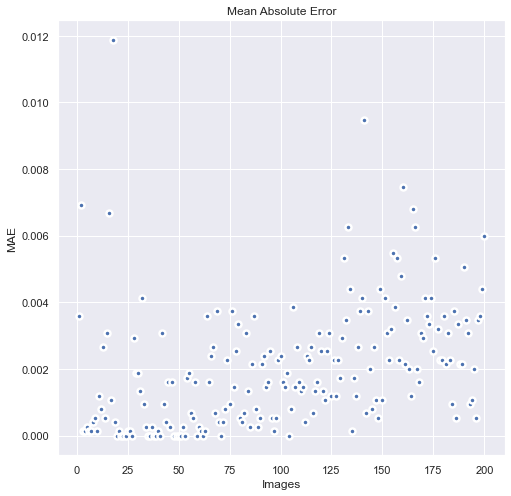

In [130]:
getScatterPlot(metric_df_cancer.MAE, metric_df_cancer, 'Mean Absolute Error', 'mae_scatter')

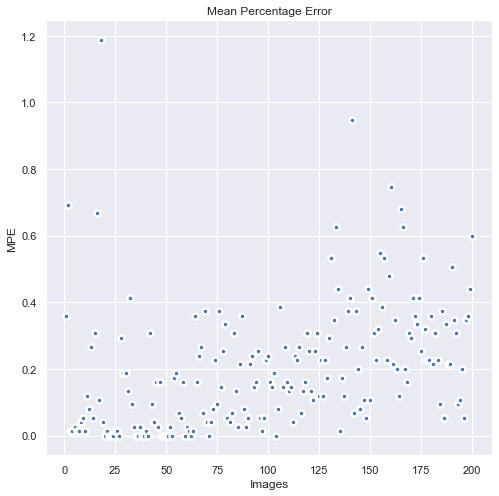

In [131]:
getScatterPlot(metric_df_cancer.MPE, metric_df_cancer, title='Mean Percentage Error', file_name='mpe_scatter')

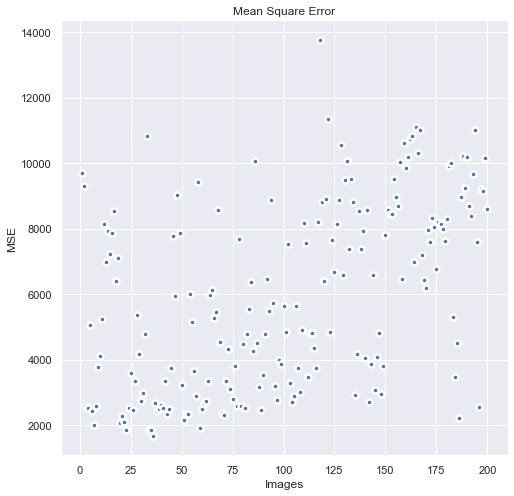

In [132]:
getScatterPlot(metric_df_cancer.MSE, metric_df_cancer, title='Mean Square Error', file_name='mse_scatter')

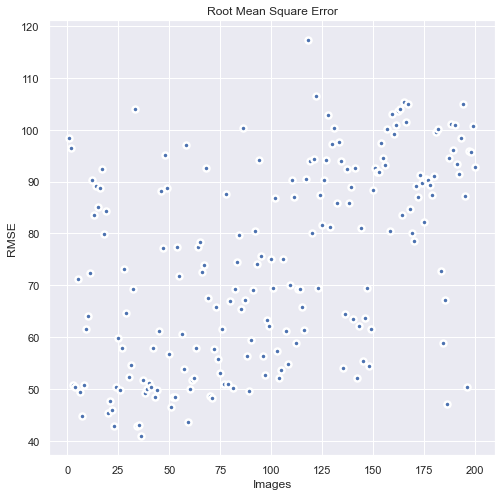

In [133]:
getScatterPlot(metric_df_cancer.RMSE, metric_df_cancer, title='Root Mean Square Error', file_name='rmse_scatter')

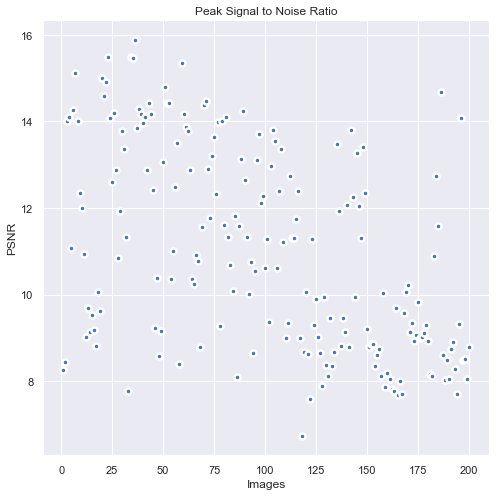

In [134]:
getScatterPlot(metric_df_cancer.PSNR, metric_df_cancer, title='Peak Signal to Noise Ratio', file_name='psnr_scatter')

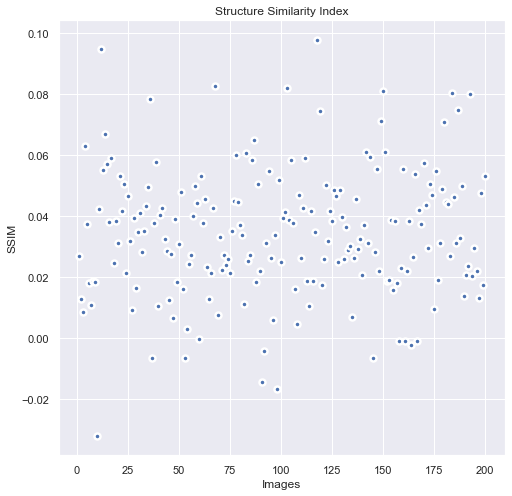

In [135]:
getScatterPlot(metric_df_cancer.SSIM, metric_df_cancer, title='Structure Similarity Index', file_name='ssim_scatter')

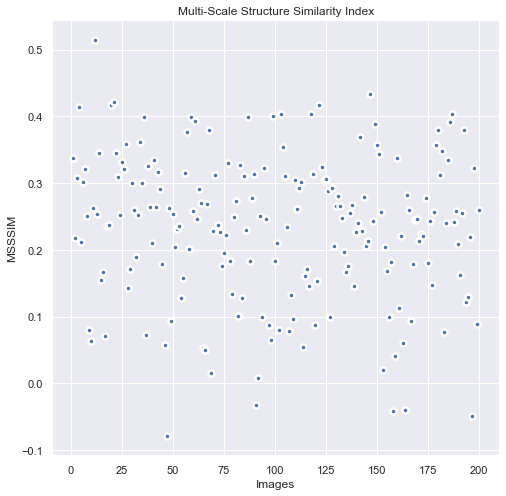

In [136]:
getScatterPlot(metric_df_cancer.MSSSIM, metric_df_cancer, title='Multi-Scale Structure Similarity Index', file_name='msssim_scatter')

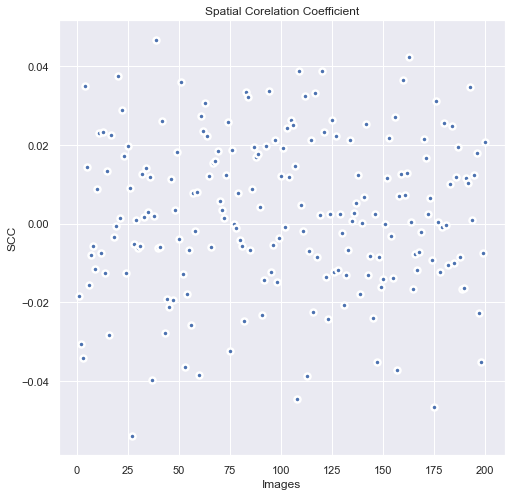

In [137]:
getScatterPlot(metric_df_cancer.SCC, metric_df_cancer, title='Spatial Corelation Coefficient', file_name='scc_scatter')

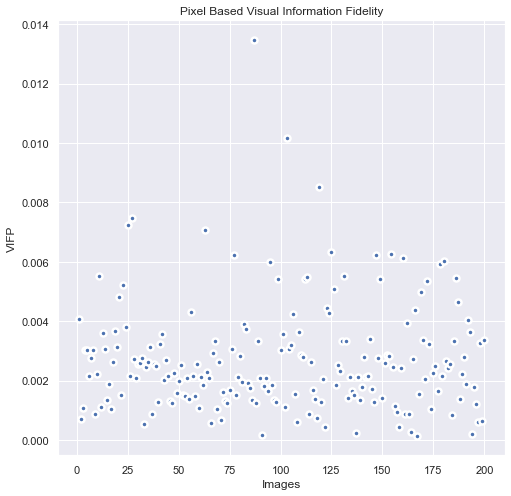

In [138]:
getScatterPlot(metric_df_cancer.VIFP, metric_df_cancer, title='Pixel Based Visual Information Fidelity', file_name='vifp_scatter')

### Regression Plot for MAE, MAPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC, and VIF-P

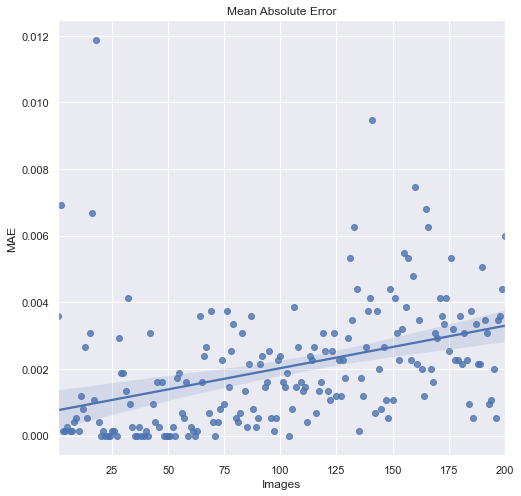

In [139]:
RegPlot(metric_df_cancer.MAE, metric_df_cancer, 'Mean Absolute Error', 'mae_scatter')

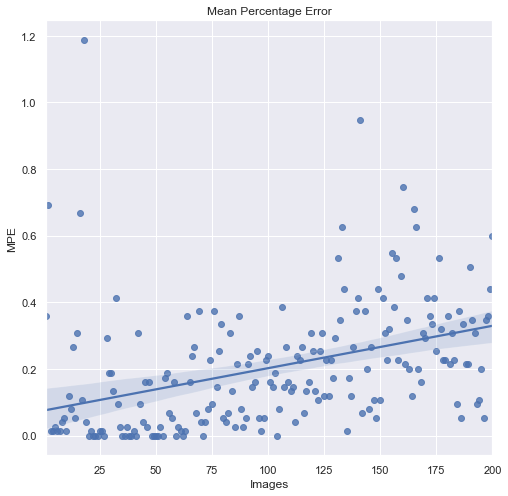

In [140]:
RegPlot(metric_df_cancer.MPE, metric_df_cancer, title='Mean Percentage Error', file_name='mpe_scatter')

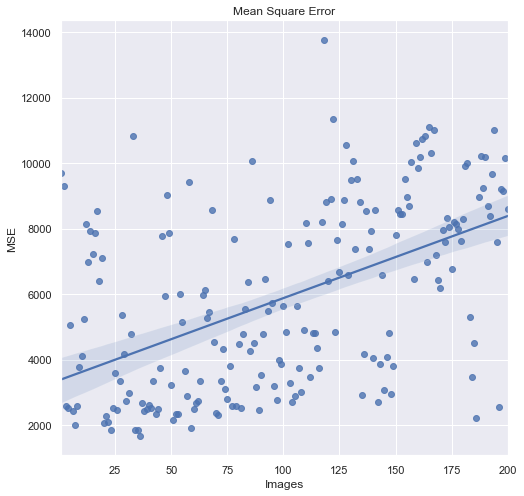

In [141]:
RegPlot(metric_df_cancer.MSE, metric_df_cancer, title='Mean Square Error', file_name='mse_scatter')

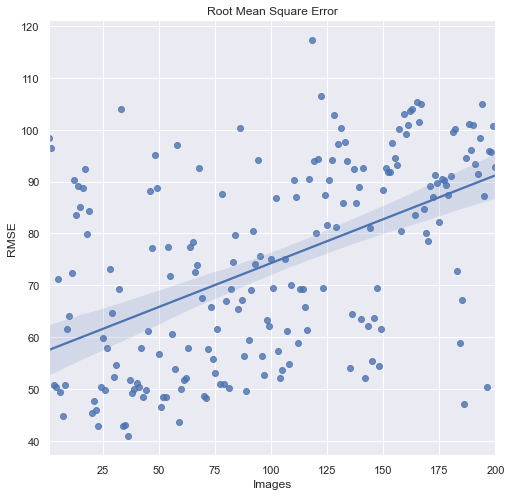

In [142]:
RegPlot(metric_df_cancer.RMSE, metric_df_cancer, title='Root Mean Square Error', file_name='rmse_scatter')

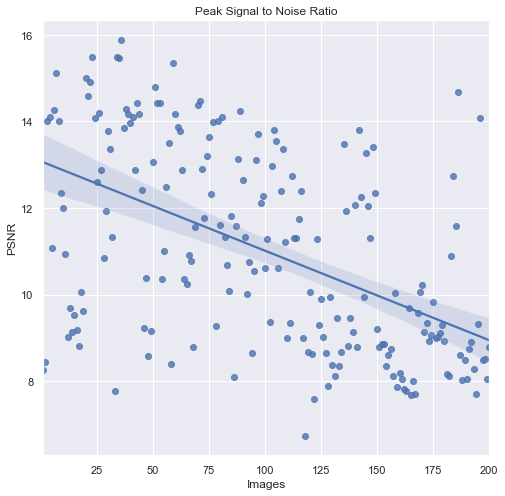

In [143]:
RegPlot(metric_df_cancer.PSNR, metric_df_cancer, title='Peak Signal to Noise Ratio', file_name='psnr_scatter')

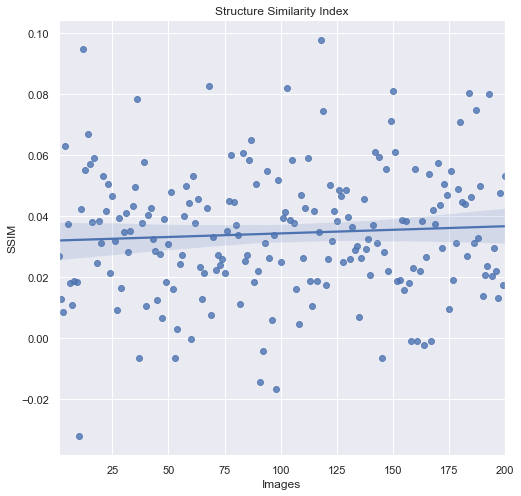

In [144]:
RegPlot(metric_df_cancer.SSIM, metric_df_cancer, title='Structure Similarity Index', file_name='ssim_scatter')

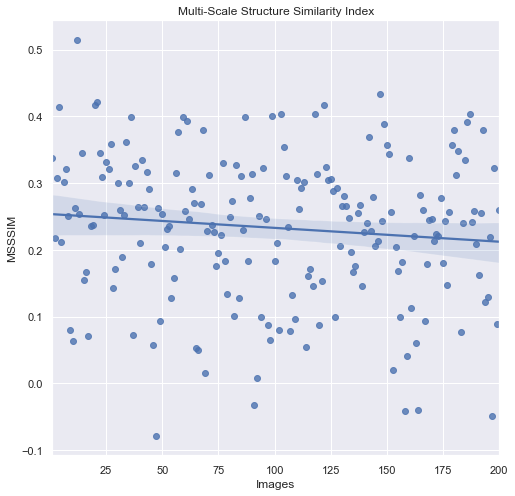

In [145]:
RegPlot(metric_df_cancer.MSSSIM, metric_df_cancer, title='Multi-Scale Structure Similarity Index', file_name='msssim_scatter')

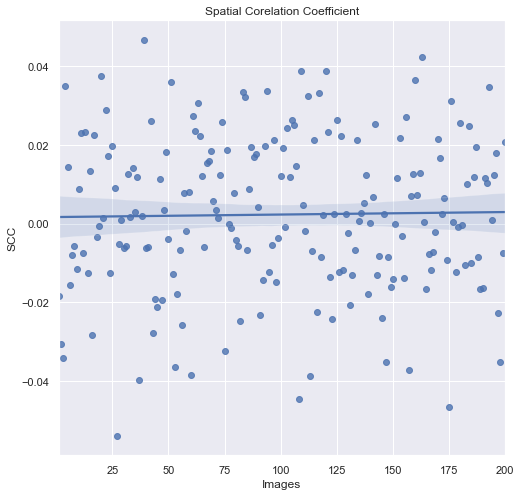

In [146]:
RegPlot(metric_df_cancer.SCC, metric_df_cancer, title='Spatial Corelation Coefficient', file_name='scc_scatter')

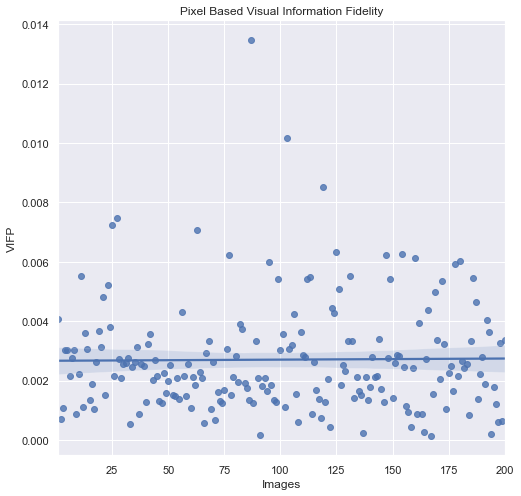

In [147]:
RegPlot(metric_df_cancer.VIFP, metric_df_cancer, title='Pixel Based Visual Information Fidelity', file_name='vifp_scatter')